## 牛顿方法

In [1]:
import numpy as np

In [2]:
def newton_method(f, x0, f_grad, f_hess, gamma=1.0, num_epochs=200, tol=1e-10):
    x = np.zeros((num_epochs+1, len(x0)))
    x[0] = x0    
    for k in range(1, num_epochs+1):
        x[k] = x[k-1] - gamma * f_grad(x[k-1]) @ np.linalg.inv(f_hess(x[k-1])) # 迭代公式
        if np.linalg.norm(f_grad(x[k])) < tol:
            print("The number of iteration: {}".format(k))
            break
    return x[k], x[:k]

## $f(x,y)=(x-4)^2+(y-1)^2+100$, 找到它的最小值

In [3]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [4]:
f = lambda X: (X[0] - 4)**2 + (X[1] - 1)**2 + 100

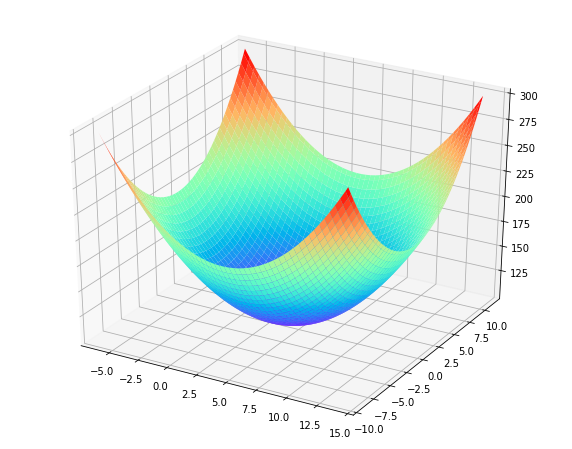

In [5]:
x1n = np.linspace(-6, 14, 100)  
x2n = np.linspace(-9, 11, 100)  
xx1n, xx2n = np.meshgrid(x1n, x2n) 
XX = np.c_[xx1n.ravel(), xx2n.ravel()]
Z = np.array([f(xx) for xx in XX]).reshape(xx1n.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx1n, xx2n, Z, cmap='rainbow')
plt.show()

In [6]:
import sympy
sympy.init_printing()

In [7]:
x, y = sympy.symbols("x, y")
f_sym = (x - 4)**2 + (y-1)**2 + 100
f_mat = sympy.Matrix([f_sym])
f_grad_sym = f_mat.jacobian([x, y])  # 计算Jacobian矩阵
f_hess_sym = f_grad_sym.jacobian([x, y])  # 计算Hessian矩阵
f_grad_sym, f_hess_sym

⎛                    ⎡2  0⎤⎞
⎜[2⋅x - 8  2⋅y - 2], ⎢    ⎥⎟
⎝                    ⎣0  2⎦⎠

In [8]:
def func_XY_to_X_Y(f):
    return lambda X: np.array(f(X[0], X[1]))

In [9]:
# 将符号化形式转换为数值形式
f_lamb = sympy.lambdify((x, y), f_sym, 'numpy')
fgrad_lamb = sympy.lambdify((x, y), f_grad_sym, 'numpy')
fhess_lamb = sympy.lambdify((x, y), f_hess_sym, 'numpy')

f = func_XY_to_X_Y(f_lamb)
f_grad = func_XY_to_X_Y(fgrad_lamb)
f_hess = func_XY_to_X_Y(fhess_lamb)

In [10]:
mini1, iter_pts1 = newton_method(f, [12, 10], f_grad, f_hess)
mini1

The number of iteration: 1


array([4., 1.])

In [11]:
mini2, iter_pts2 = newton_method(f, [-5, -5], f_grad, f_hess, 
                                 num_epochs=300, gamma=0.1)
mini2

The number of iteration: 248


array([4., 1.])

In [13]:
mini3, iter_pts3 = newton_method(f, [-5, 5], f_grad, f_hess, 
                                 num_epochs=300, gamma=0.1)
mini3

The number of iteration: 247


array([4., 1.])

In [14]:
mini4, iter_pts4 = newton_method(f, np.array([5, 5]), f_grad, f_hess, 
                                 num_epochs=300, gamma=0.1)
mini4

The number of iteration: 239


array([4., 1.])

In [15]:
mini5, iter_pts5 = newton_method(f, np.array([5, -5]), f_grad, f_hess,
                                 num_epochs=300, gamma=0.1)
mini5

The number of iteration: 243


array([4., 1.])

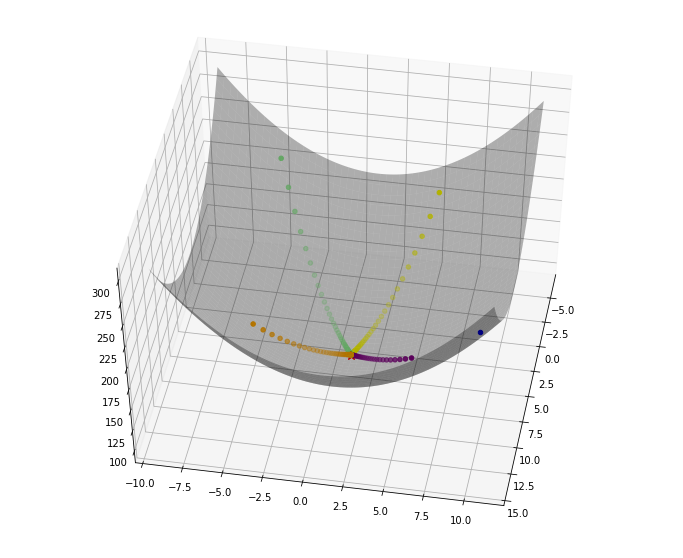

In [22]:
iter_pts = [iter_pts1, iter_pts2, iter_pts3, iter_pts4, iter_pts5]
colors = ['blue', 'lightgreen', 'yellow', 'purple', 'orange']
f_iter_pts = []
for ip in iter_pts:
    f_iter_pts.append([f(p) for p in ip])

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx1n, xx2n, Z, color='black', alpha=0.3)
for i, ip in enumerate(iter_pts):
    ax.scatter(ip[:, 0], ip[:, 1], f_iter_pts[i], color=colors[i])
ax.scatter(mini1[0], mini1[1], f(mini1), marker='*', color='r', s=100)
ax.view_init(elev=50, azim=10)
plt.show()

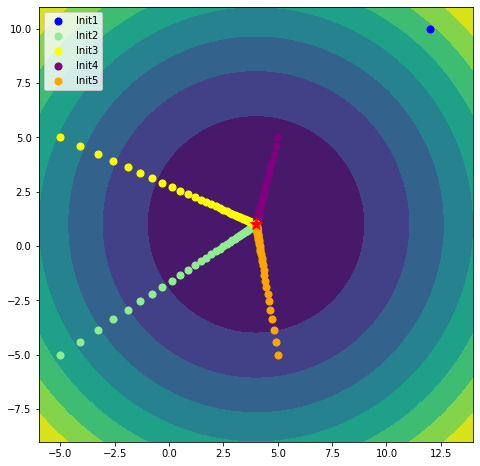

In [24]:
plt.figure(figsize=(8, 8))
plt.contourf(xx1n, xx2n, Z)
for i, ip in enumerate(iter_pts):
    plt.scatter(ip[:, 0], ip[:, 1], c=colors[i], s=50, label="Init{}".format(i+1))
plt.scatter(mini1[0], mini1[1], c='red', marker="*", s=150)
plt.legend()
plt.axis('square')
plt.show()

### Using `Scipy`

In [18]:
from scipy import optimize

x_opt = optimize.minimize(f, (0, 0))
x_opt

      fun: 100.00000000000513
 hess_inv: array([[ 0.52941168, -0.11764665],
       [-0.11764665,  0.97058844]])
      jac: array([0.00000000e+00, 4.76837158e-06])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([3.99999997, 1.00000227])